In [301]:
#Import all relevant libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [302]:
folder_path = kagglehub.dataset_download("ourfuture/world-university-rankings")
files = os.listdir(folder_path)

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [303]:
os.listdir(folder_path)
dataframes = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path): 
        df = pd.read_excel(file_path)
        dataframes[file] = df

In [304]:
#Read in the csv file and convert to a Pandas dataframe
shanghai_rank_df = dataframes[list(dataframes.keys())[0]]
times_higher_edu_df = dataframes[list(dataframes.keys())[1]]
word_rank_univ_df = dataframes[list(dataframes.keys())[2]]

In [305]:
shanghai_rank_df.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [306]:
times_higher_edu_df.sample(10)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
205,201–300,AlMaarefa University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,NaN,NaN,1.0,71.5,NaN,NaN,81.9–86.9,76.8–82.1,NaN,NaN,8.0,62.4–66.3,3.0,81.6,NaN,NaN
233,201–300,École des Mines de Saint-Étienne,https://www.timeshighereducation.com/world-uni...,France,NaN,NaN,12.0,81.3,NaN,NaN,75.6–81.7,76.8–82.1,NaN,NaN,8.0,66.4–71.5,NaN,NaN,7.0,69.3
193,101–200,University of Vigo,https://www.timeshighereducation.com/world-uni...,Spain,9.0,73.0–87.2,NaN,NaN,NaN,NaN,81.9–86.9,82.2–88.2,NaN,NaN,7.0,71.3,4.0,85.6,NaN,NaN
1365,1001+,Northern Technical University,https://www.timeshighereducation.com/world-uni...,Iraq,12.0,58.7–66.7,13.0,48.0–56.4,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,7.0,38.7–51.8,NaN,NaN,NaN,NaN
428,401–600,CES University,https://www.timeshighereducation.com/world-uni...,Colombia,12.0,58.7–66.7,NaN,NaN,NaN,NaN,61.1–70.5,66.9–72.6,NaN,NaN,NaN,NaN,3.0,73.5–78.9,5.0,51.6–56.0
1381,1001+,Universidad Panamericana (UP),https://www.timeshighereducation.com/world-uni...,Mexico,1.0,49.5–54.4,3.0,32.1–44.6,4.0,35.8–43.5,45.3–53.3,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,1001+,University of Mascara,https://www.timeshighereducation.com/world-uni...,Algeria,NaN,NaN,8.0,1.4–35.6,1.0,38.2–49.4,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,16.0,29.1–45.0
600,601–800,Acharya Nagarjuna University,https://www.timeshighereducation.com/world-uni...,India,5.0,51.6–56.0,NaN,NaN,NaN,NaN,1.5–45.2,59.7–66.7,NaN,NaN,9.0,73.0–87.2,NaN,NaN,4.0,58.7–62.5
1580,1001+,Yagshigeldi Kakayev International University o...,https://www.timeshighereducation.com/world-uni...,Turkmenistan,NaN,NaN,NaN,NaN,6.0,24.8–42.6,1.5–45.2,7.9–53.8,4.0,51.0–58.6,8.0,48.4–57.7,NaN,NaN,NaN,NaN
1486,1001+,Tambov State Technical University,NaN,NaN,11.0,52.5–60.0,NaN,NaN,4.0,35.8–43.5,1.5–45.2,7.9–53.8,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
word_rank_univ_df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [308]:
print("shanghai_rank_df ",shanghai_rank_df.shape)
print("times_higher_edu_df ",times_higher_edu_df.shape)
print("word_rank_univ_df ",word_rank_univ_df.shape)

shanghai_rank_df  (1000, 6)
times_higher_edu_df  (1591, 20)
word_rank_univ_df  (2000, 9)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [309]:
print("shanghai_rank_df columns", shanghai_rank_df.columns)
print("\nword_rank_univ_df columns" ,word_rank_univ_df.columns)
print("\ntimes_higher_edu_df columns",times_higher_edu_df.columns)

shanghai_rank_df columns Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

word_rank_univ_df columns Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

times_higher_edu_df columns Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-score-multi__value 8'],
      dtype='objec

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [310]:
# the data source has the data from the website of the system ranking

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [311]:
# There is no period of interest for the analysis and the data is updated since 2023 (Updated a year ago)

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [312]:
# each of dataset has its own format and values due their criteria of evaluating universities

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [313]:
# as the study requires, we need to find:

# 1- top 10 universities 
# (we can extract this info from all datasets due their global evalualtion and no factor required)

# 2- top 10 universities for employment outcomes 
# (we can extract this info from CWUR dataset since it has Employability Rank column)

# 3- What positions do universities in Saudi Arabia hold within the global rankings? 
# (we extract this info from shanghi and CWUR because these only datasets has saudi universities)

# 4- which factor has the most significant impact on a university's overall ranking? 
# (only CWUR address factors in its dataset)

# 5- correlation between national and global university rankings 
# (only CWUR and shanghi datasets has global and national ranking columns)

# a primary conclusion: we may not need the factors of THE dataset since shanghi and CWUR contains required information for this study

# all columns of CWUR (word_rank_univ_df) is important to answer question 4, no drop applied

# all columns of shanghi (shanghai_rank_df) to answer question 1 and 3 because no factors required and shanghi is well known ranking system globally, no drop applied

<em>we have asked the auther to explain the sgd_score columns and this was his explination:</em>
<ul>
<li>
SDG 1: No Poverty
</li>
SDG 2: Zero Hunger
<li>
SDG 3: Good Health and Well-being
</li>
<li>
SDG 4: Quality Education
</li>
<li>
SDG 5: Gender Equality
</li>
SDG 6: Clean Water and Sanitation
<li>
SDG 7: Affordable and Clean Energy
</li>
<li>
SDG 8: Decent Work and Economic Growth
</li>
<li>
SDG 9: Industry, Innovation, and Infrastructure
</li>
<li>
SDG 10: Reduced Inequality
</li>
<li>
SDG 11: Sustainable Cities and Communities
</li>
<li>
SDG 12: Responsible Consumption and Production
</li>
<li>
SDG 13: Climate Action
</li>
<li>
SDG 14: Life Below Water
</li>
<li>
SDG 15: Life on Land
</li>
<li>
SDG 16: Peace, Justice, and Strong Institutions
</li>
<li>
SDG 17: Partnerships for the Goals
</li>
</ul>

In [314]:
times_higher_edu_df.drop(['sdg-score-multi__number','sdg-score-multi__value','sdg-score-multi__number 2','sdg-score-multi__value 2'
                          ,'sdg-score-multi__number 3','sdg-score-multi__value 3',
                          'sdg-score-multi__value 4','sdg-score-multi__number 5','sdg-score-multi__value 5'
                          ,'sdg-score-multi__number 6','sdg-score-multi__value 6','sdg-score-multi__number 7',
                          'sdg-score-multi__value 7','sdg-score-multi__number 8','sdg-score-multi__value 8']
                         ,axis=1,inplace=True)

#### Universities Logo is not relevent either for this study:

In [315]:
shanghai_rank_df.drop(['LOGO'],axis=1,inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [316]:
word_rank_univ_df.duplicated().sum()

0

In [317]:
shanghai_rank_df.duplicated().sum()

0

In [318]:
times_higher_edu_df.duplicated().sum()

0

In [319]:
# there are no duplicated rows

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [320]:
#Display number missing values per column as empty value
word_rank_univ_df.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [321]:
#Display number missing values per column as empty value
shanghai_rank_df.isnull().sum().sort_values(ascending = False)

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
University Detail         0
dtype: int64

In [322]:
#Display number missing values per column as empty value
times_higher_edu_df.isnull().sum().sort_values(ascending = False)

ranking-institution-title href    91
Location                          91
Rank                               0
University Name                    0
scores                             0
dtype: int64

### the percentage of missing values in each column in THE dataset

In [323]:
(times_higher_edu_df.isnull().mean().round(2)*100).sort_values(ascending=False)

ranking-institution-title href    6.0
Location                          6.0
Rank                              0.0
University Name                   0.0
scores                            0.0
dtype: float64

In [324]:
mask = (shanghai_rank_df['Total Score'] == 0.0) 
shanghai_rank_df[mask].sum()

Ranking                   101-150101-150101-150101-150101-150101-150101-...
University Name           Arizona State UniversityCentral South Universi...
National/Regional Rank    40-549-1340-5440-541-21-240-549-139-135-724-69...
Total Score                                                             0.0
University Detail         http://www.shanghairanking.com/institution/ari...
dtype: object

In [325]:
shanghai_rank_df.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'University Detail '],
      dtype='object')

In [326]:
shanghai_rank_df.iloc[0:99]

,Ranking,University Name,National/Regional Rank,Total Score,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...
94,95,KU Leuven,2,26.3,http://www.shanghairanking.com/institution/ku-...
95,96,Huazhong University of Science and Technology,8,26.1,http://www.shanghairanking.com/institution/hua...
96,96,The University of Hong Kong,1,26.1,http://www.shanghairanking.com/institution/the...
97,98,Seoul National University,1,25.9,http://www.shanghairanking.com/institution/seo...


In [327]:
shanghai_rank_df.head(15)

,Ranking,University Name,National/Regional Rank,Total Score,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/institution/uni...
5,6,Princeton University,5,60.0,http://www.shanghairanking.com/institution/pri...
6,7,University of Oxford,2,58.7,http://www.shanghairanking.com/institution/uni...
7,8,Columbia University,6,57.2,http://www.shanghairanking.com/institution/col...
8,9,California Institute of Technology,7,56.1,http://www.shanghairanking.com/institution/cal...
9,10,University of Chicago,8,55.1,http://www.shanghairanking.com/institution/uni...


In [328]:
shanghai_rank_df.iloc[100:130]

,Ranking,University Name,National/Regional Rank,Total Score,University Detail
100,101-150,Aix Marseille University,5-7,11.9,http://www.shanghairanking.com/institution/aix...
101,101-150,Arizona State University,40-54,0.0,http://www.shanghairanking.com/institution/ari...
102,101-150,Boston University,40-54,10.7,http://www.shanghairanking.com/institution/bos...
103,101-150,Carnegie Mellon University,40-54,29.7,http://www.shanghairanking.com/institution/car...
104,101-150,Case Western Reserve University,40-54,30.7,http://www.shanghairanking.com/institution/cas...
105,101-150,Central South University,9-13,0.0,http://www.shanghairanking.com/institution/cen...
106,101-150,Emory University,40-54,0.0,http://www.shanghairanking.com/institution/emo...
107,101-150,Icahn School of Medicine at Mount Sinai,40-54,0.0,http://www.shanghairanking.com/institution/ica...
108,101-150,Indiana University Bloomington,40-54,9.2,http://www.shanghairanking.com/institution/ind...
109,101-150,King Abdulaziz University,1-2,0.0,http://www.shanghairanking.com/institution/kin...


In [329]:
# the shanghi is complete, no missing values

In [330]:
mask = word_rank_univ_df == "-"
word_rank_univ_df[mask].count()
word_rank_univ_df[mask.any(axis=1)]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
35,36Top 0.2%,"University of California, San Francisco",USA,23,-,1554,15,27,86.0
37,38Top 0.2%,Karolinska Institute,Sweden,1,39,-,35,62,85.8
43,44Top 0.3%,Tsinghua University,China,1,346,56,-,20,85.2
48,49Top 0.3%,Peking University,China,2,369,58,-,25,84.8
54,55Top 0.3%,University of Chinese Academy of Sciences,China,3,-,1304,-,6,84.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [331]:
# go to clean data

In [332]:
shanghai_rank_df.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
University Detail          object
dtype: object

In [333]:
# go to clean step

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [334]:
# check columns types 
word_rank_univ_df.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [335]:
shanghai_rank_df.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
University Detail          object
dtype: object

In [336]:
times_higher_edu_df.dtypes

Rank                              object
University Name                   object
ranking-institution-title href    object
Location                          object
scores                            object
dtype: object

In [337]:
# go to correct errors

## 3. Univariate Analysis: 

In [338]:
# check outliers 

### 1. Univariate Graphical Analysis:

#### I. Numerical Variables:

In [339]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

#### World rank university rank system (CWUR)

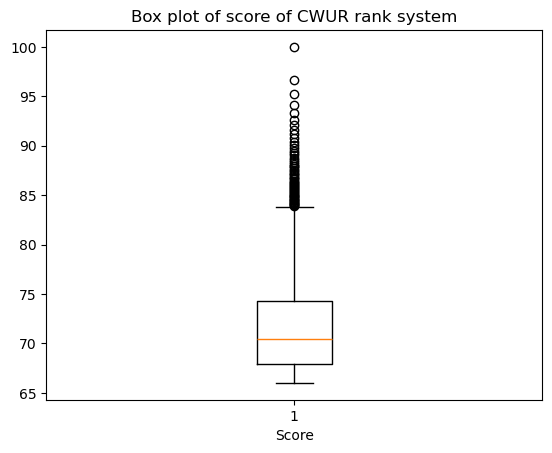

In [340]:
plt.boxplot(word_rank_univ_df['Score'])
plt.xlabel("Score")
plt.title(f'Box plot of score of CWUR rank system')
plt.show()

#### Shanghi rank system

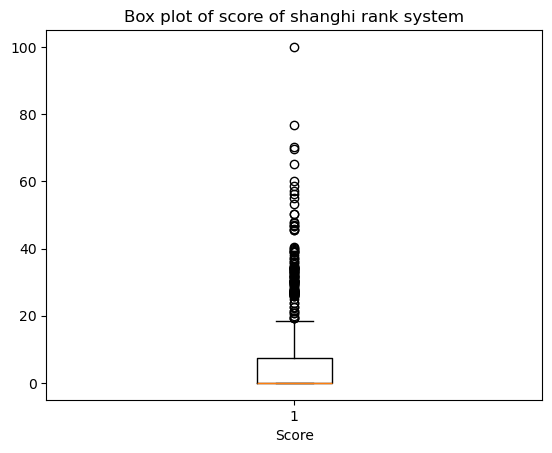

In [341]:
plt.boxplot(shanghai_rank_df['Total Score'])
plt.xlabel("Score")
plt.title(f'Box plot of score of shanghi rank system')
plt.show()

In [246]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [247]:
# go to delete ouliers

#### II. Categorical Variables:

Text(0.5, 1.0, 'Detect outliers for the first 20th countries')

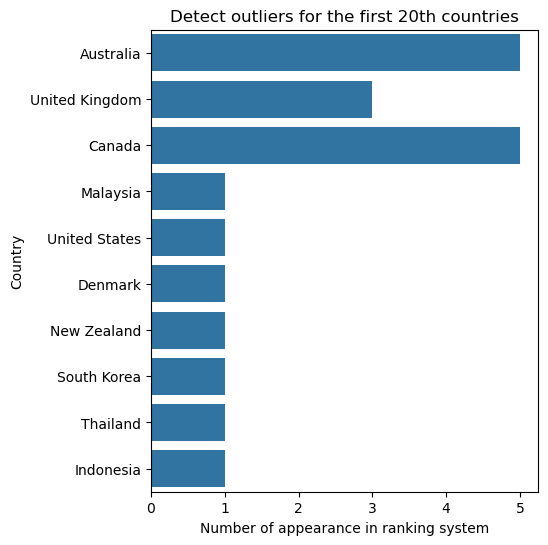

In [248]:
plt.figure(figsize=(5,6))
sns.countplot(times_higher_edu_df['Location'].iloc[0:20])
plt.xlabel("Number of appearance in ranking system")
plt.ylabel("Country")
plt.title("Detect outliers for the first 20th countries")

### 2. Univariate Non-Graphical analysis:

In [249]:
shanghai_rank_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ranking,1000,93,901-1000,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University Name,1000,1000,Harvard University,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National/Regional Rank,1000,136,1,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Score,1000.0,NaN,NaN,NaN,5.9435,12.379624,0.0,0.0,0.0,7.5,100.0
University Detail,1000,1000,http://www.shanghairanking.com/institution/har...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
word_rank_univ_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
World Rank,2000,2000,1Top 0.1%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University Names,2000,2000,Harvard University\n CWUR Rating System: Ed...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2000,95,USA,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Rank,2000.0,NaN,NaN,NaN,69.245,85.538608,1.0,9.75,33.0,89.0,332.0
Educational Rank,2000,439,-,1562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employability Rank,2000,1030,-,967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faculty Rank,2000,262,-,1727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Research Rank,2000,1935,-,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,2000.0,NaN,NaN,NaN,71.75555,5.0388,66.0,67.9,70.4,74.3,100.0


In [251]:
times_higher_edu_df.describe(include='all').T

,count,unique,top,freq
Rank,1591,64,1001+,591
University Name,1591,1591,Western Sydney University,1
ranking-institution-title href,1500,1500,https://www.timeshighereducation.com/world-uni...,1
Location,1500,110,Turkey,79
scores,1591,64,7.9–53.8,591


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [344]:
# replace missing values with 0s
word_rank_univ_df[["Educational Rank", "Employability Rank", "Faculty Rank", "Research Rank"]] = word_rank_univ_df[["Educational Rank", "Employability Rank", "Faculty Rank", "Research Rank"]].replace("-", 0)

In [345]:
word_rank_univ_df.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [346]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

#### World ranking system (CWUR)

In [347]:
# convert columns to integers
word_rank_univ_df[["Educational Rank", "Employability Rank", "Faculty Rank", "Research Rank"]] = word_rank_univ_df[["Educational Rank", "Employability Rank", "Faculty Rank", "Research Rank"]].astype(int)

In [348]:
# convert world rank to numbers and split percentage to new column called ranke_percentage
word_rank_univ_df['Ranke percentage%']=word_rank_univ_df['World Rank'].map(lambda x:float(x.split("p")[1].split("%")[0]))

In [349]:
word_rank_univ_df.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
Ranke percentage%     float64
dtype: object

In [350]:
word_rank_univ_df['World Rank'] = word_rank_univ_df['World Rank'].map(lambda x : int(x.split("T")[0]))

#### Shanghi ranking system

In [351]:
shanghai_rank_df = shanghai_rank_df[pd.to_numeric(shanghai_rank_df['Ranking'], errors='coerce').notna()]
shanghai_rank_df['Ranking'] = shanghai_rank_df['Ranking'].astype('int')

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1591972296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_rank_df['Ranking'] = shanghai_rank_df['Ranking'].astype('int')


In [352]:
len(shanghai_rank_df)

100

In [353]:
mask = shanghai_rank_df['National/Regional Rank'].str.contains("-", na=False)
shanghai_rank_df[mask]

,Ranking,University Name,National/Regional Rank,Total Score,University Detail
43,44,Rockefeller University,25-26,33.8,http://www.shanghairanking.com/institution/roc...
45,44,"University of Minnesota, Twin Cities",25-26,33.8,http://www.shanghairanking.com/institution/uni...
83,83,Technion-Israel Institute of Technology,2-3,27.2,http://www.shanghairanking.com/institution/tec...
85,83,Weizmann Institute of Science,2-3,27.2,http://www.shanghairanking.com/institution/wei...


In [354]:
shanghai_rank_df.head(30)

,Ranking,University Name,National/Regional Rank,Total Score,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/institution/uni...
5,6,Princeton University,5,60.0,http://www.shanghairanking.com/institution/pri...
6,7,University of Oxford,2,58.7,http://www.shanghairanking.com/institution/uni...
7,8,Columbia University,6,57.2,http://www.shanghairanking.com/institution/col...
8,9,California Institute of Technology,7,56.1,http://www.shanghairanking.com/institution/cal...
9,10,University of Chicago,8,55.1,http://www.shanghairanking.com/institution/uni...


In [355]:
shanghai_rank_df[mask]['National/Regional Rank'].map(lambda x: x.split('-'))

43    [25, 26]
45    [25, 26]
83      [2, 3]
85      [2, 3]
Name: National/Regional Rank, dtype: object

In [356]:
shanghai_rank_df[mask]['National/Regional Rank'].map(lambda x: x.split('-')[0]).index

Index([43, 45, 83, 85], dtype='int64')

In [357]:
# remove dash from national ranks
values = (shanghai_rank_df[mask]['National/Regional Rank']).map(lambda x: x.split('-')[0]).to_list()
index = (shanghai_rank_df[mask]['National/Regional Rank']).map(lambda x: x.split('-')[0]).index.to_list()
for indx, val in zip(index, values):
 shanghai_rank_df.at[indx, 'National/Regional Rank'] = val

#### Times higher education ranking system

In [358]:
print(times_higher_edu_df['Rank'].unique())

['1' '2' '3' '4' '5' '6' '=7' '=9' '12' '13' '=14' '17' '=18' '20' '21'
 '22' '23' '=24' '=26' '28' '=29' '32' '33' '=34' '=36' '38' '39' '=40'
 '=42' '=46' '=49' '=52' '55' '56' '57' '=58' '=61' '63' '=64' '66' '=67'
 '69' '70' '71' '=72' '=74' '=77' '=79' '=83' '85' '=86' '91' '=92' '96'
 '=97' '99' '=100' '101–200' '201–300' '301–400' '401–600' '601–800'
 '801–1000' '1001+']


<em>some of them is not a valid rank such as:</em>

'=42' '=46' '=49' '=52' '55' '56' '57' '=58' '=61' '63' '=64' '66' '=67'

 '69' '70' '71' '=72' '=74' '=77' '=79' '=83' '85' '=86' '91' '=92' '96'

 '=97' '99' '=100' '101–200' '201–300' '301–400' '401–600' '601–800'
 
 '801–1000' '1001+'

In [359]:
#convert invalid ranks to NaN
times_higher_edu_df['Rank'] = pd.to_numeric(times_higher_edu_df['Rank'], errors='coerce')

#fill NaN with a default value
times_higher_edu_df['Rank'].fillna(times_higher_edu_df['Rank'].mean(), inplace=True)  # Filling with the mean

#convert to integer if needed
times_higher_edu_df['Rank'] = times_higher_edu_df['Rank'].astype(int)

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\4044307694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  times_higher_edu_df['Rank'].fillna(times_higher_edu_df['Rank'].mean(), inplace=True)  # Filling with the mean


In [360]:
print(times_higher_edu_df['Rank'].unique())

[ 1  2  3  4  5  6 39 12 13 17 20 21 22 23 28 32 33 38 55 56 57 63 66 69
 70 71 85 91 96 99]


In [361]:
times_higher_edu_df['scores'].unique()

array(['99.4', '97.5', '97.2', '96.9', '96.6', '96.5', '96.4', '95.8',
       '95.6', '95.4', '95.0', '94.8', '94.5', '94.4', '94.0', '93.9',
       '93.8', '93.5', '93.4', '93.0', '92.9', '92.8', '92.7', '92.6',
       '92.5', '92.4', '92.3', '92.1', '91.9', '91.8', '91.3', '91.2',
       '91.1', '91.0', '90.9', '90.8', '90.7', '90.6', '90.5', '90.4',
       '90.3', '90.1', '90.0', '89.9', '89.8', '89.7', '89.6', '89.5',
       '89.4', '89.3', '89.2', '89.1', '89.0', '88.7', '88.6', '88.4',
       '88.3', '82.2–88.2', '76.8–82.1', '72.7–76.7', '66.9–72.6',
       '59.7–66.7', '53.9–59.6', '7.9–53.8'], dtype=object)

In [362]:
#convert invalid ranks to NaN
times_higher_edu_df['scores'] = pd.to_numeric(times_higher_edu_df['scores'], errors='coerce')

#fill NaN with a default value
times_higher_edu_df['scores'].fillna(times_higher_edu_df['scores'].mean(), inplace=True)  # Filling with the mean

#convert to integer if needed
times_higher_edu_df['scores'] = times_higher_edu_df['scores'].astype(int)

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\606095144.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  times_higher_edu_df['scores'].fillna(times_higher_edu_df['scores'].mean(), inplace=True)  # Filling with the mean


In [363]:
times_higher_edu_df['scores'].unique()

array([99, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88])

In [364]:
# go back to 7th dimension Accuracy 

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

**numerical & numerical --> (Scatter plot)**

#### CWUR Ranking System

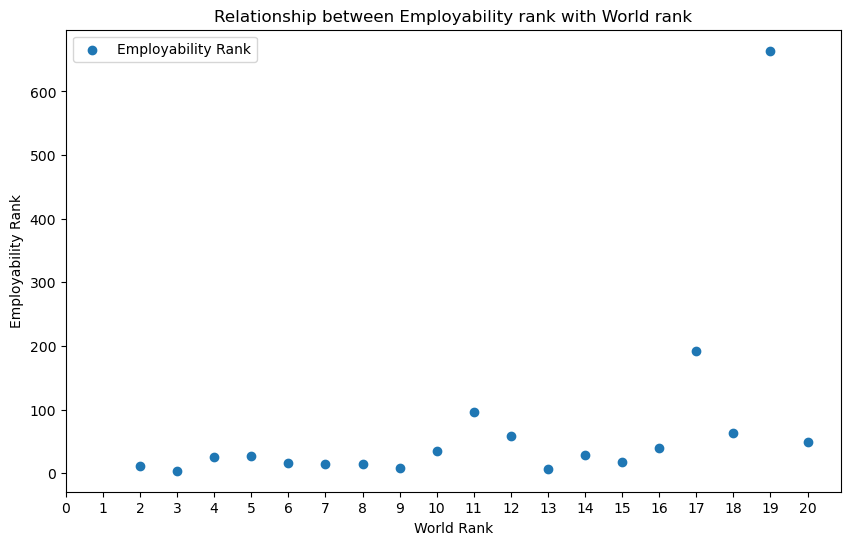

In [277]:
plt.figure(figsize=(10,6))
plt.scatter(word_rank_univ_df['World Rank'].iloc[1:20], word_rank_univ_df['Employability Rank'].iloc[1:20], marker='o', label='Employability Rank')
#adding title and labels
plt.title('The relationship between Employability rank with World rank')
plt.xlabel('World Rank')
plt.xticks(range(0,21))
plt.ylabel('Employability Rank')

#add legend
plt.legend()

#ahow plot
plt.show()

#### Shanghi ranking system

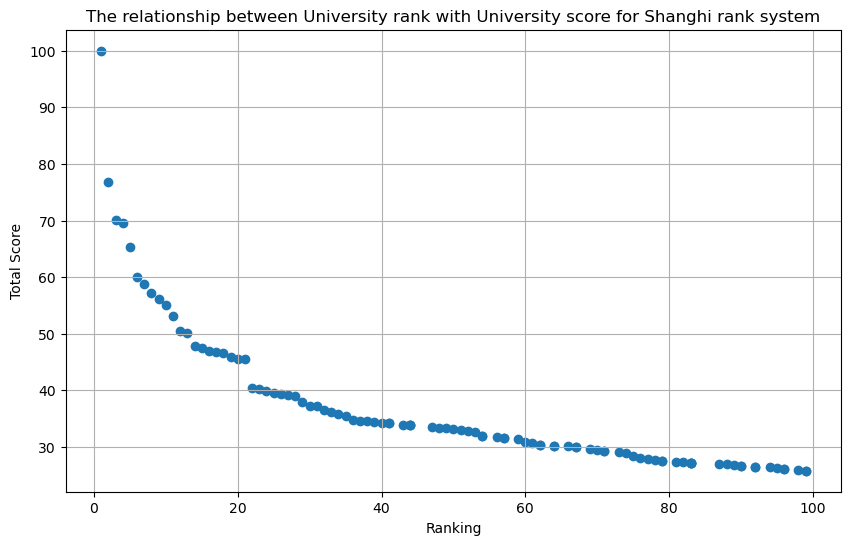

In [281]:
#line plot
plt.figure(figsize=(10,6))
plt.scatter(shanghai_rank_df['Ranking'], shanghai_rank_df['Total Score'], marker='o')

#labels and title
plt.xlabel('Ranking')
plt.ylabel('Total Score')
plt.title('The relationship between University rank with University score for Shanghi rank system')

#show the plot
plt.grid(True)
plt.show()

#### High times education ranking system

In [280]:
times_higher_edu_df.dtypes

Rank                               int32
University Name                   object
ranking-institution-title href    object
Location                          object
scores                            object
dtype: object

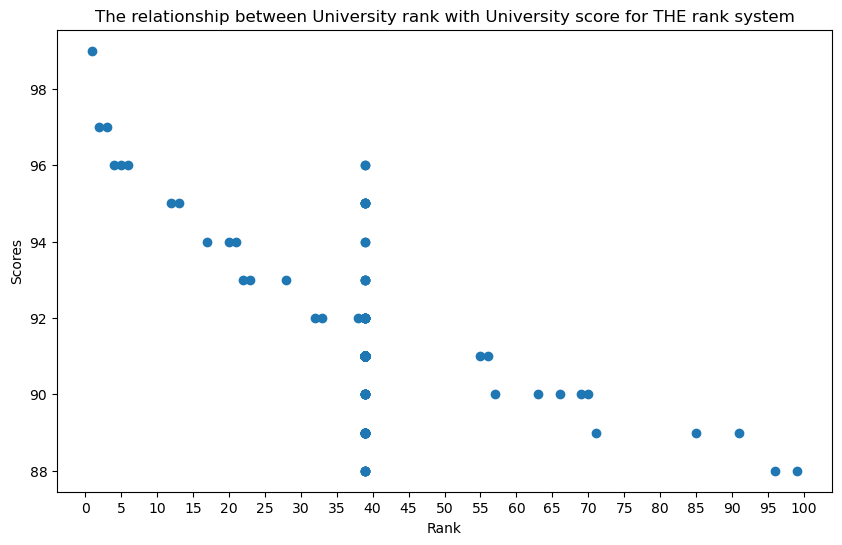

In [370]:
plt.figure(figsize=(10, 6))
plt.scatter(times_higher_edu_df['Rank'], times_higher_edu_df['scores'],marker='o')

#titles and labels
plt.title('The relationship between University rank with University score for THE rank system')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.xticks(range(0,101,5))

#show the plot
plt.show()

##### Q1 Which universities are ranked in the top 10 globally?

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1494124186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='Total Score', y='University Name', data=shanghai_rank_df[:10], palette = 'viridis', width = 0.8)


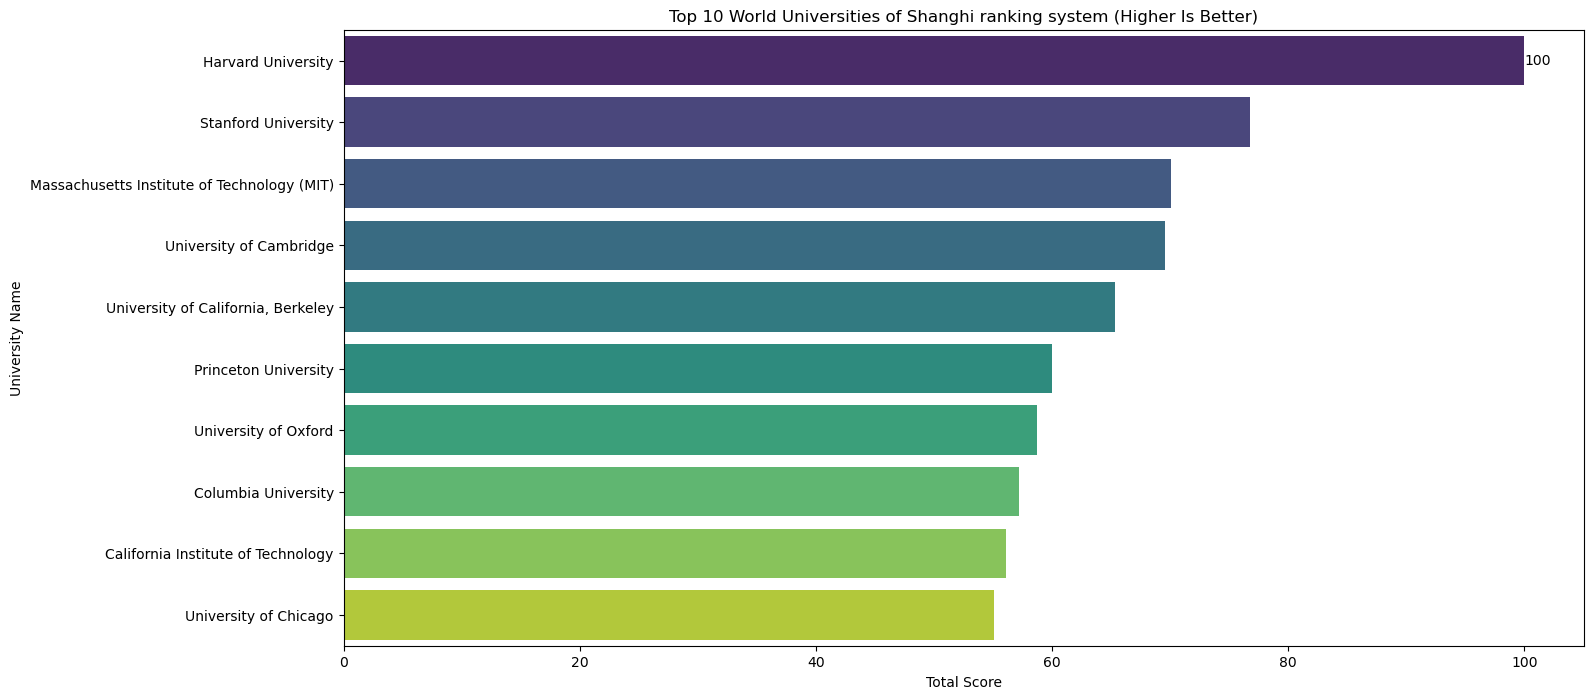

In [377]:
plt.figure(figsize=(16,8))
plt.title('Top 10 World Universities of Shanghi ranking system (Higher Is Better)')
t = sns.barplot(x='Total Score', y='University Name', data=shanghai_rank_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])
plt.show()

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\3848403959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='Score', y='University Names', data=word_rank_univ_df[:10], palette = 'viridis', width = 0.8)


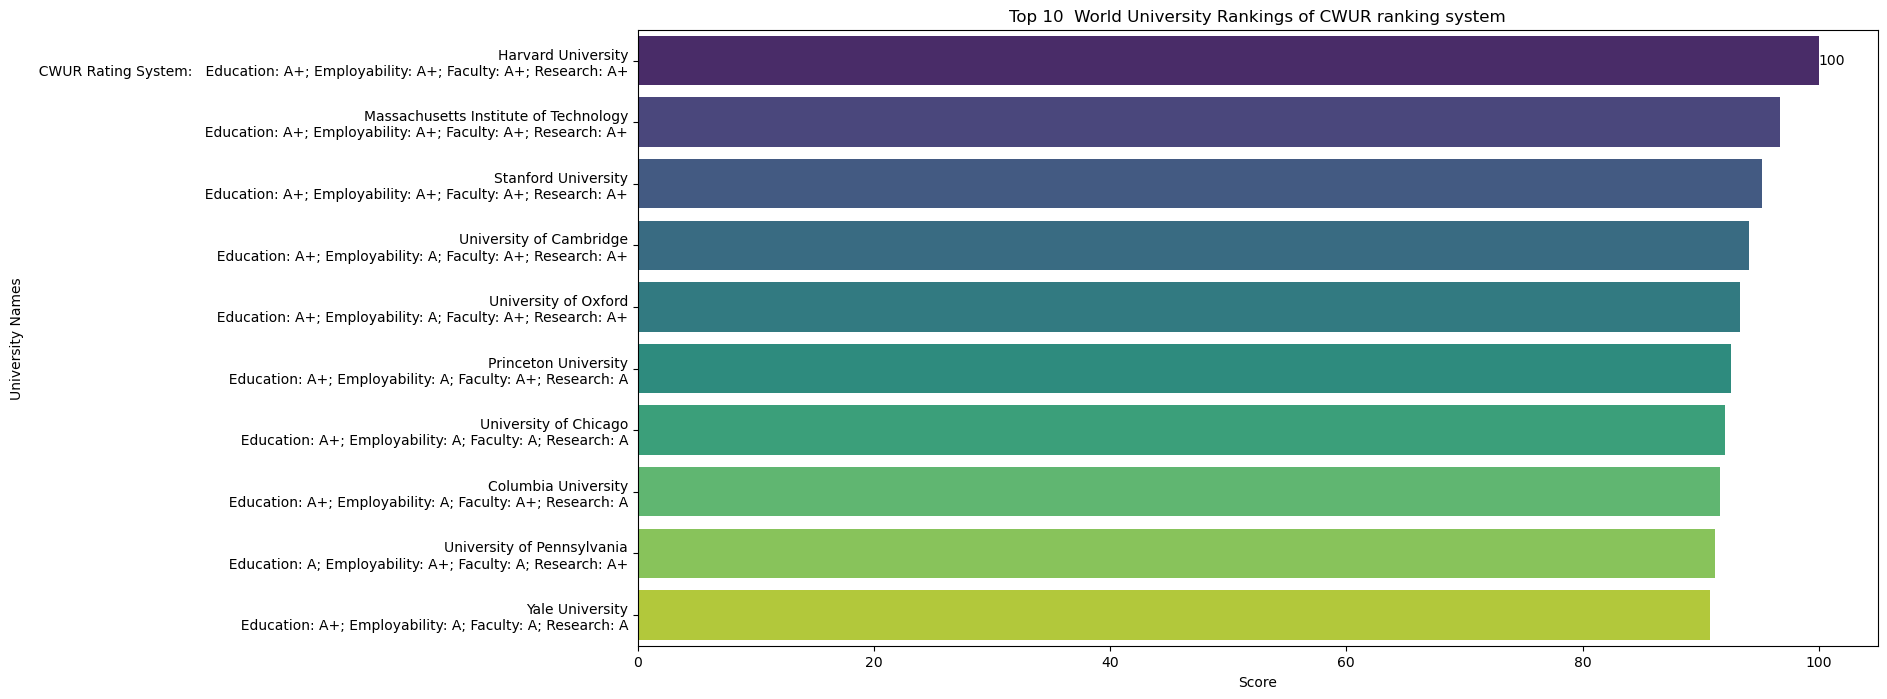

In [378]:

plt.figure(figsize=(16,8))
plt.title('Top 10  World University Rankings of CWUR ranking system')
t = sns.barplot(x='Score', y='University Names', data=word_rank_univ_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])
plt.show()

In [389]:
times_higher_edu_df.columns

Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'scores'],
      dtype='object')

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1562558621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='scores', y='University Name ', data=times_higher_edu_df[:10], palette = 'viridis', width = 0.8)


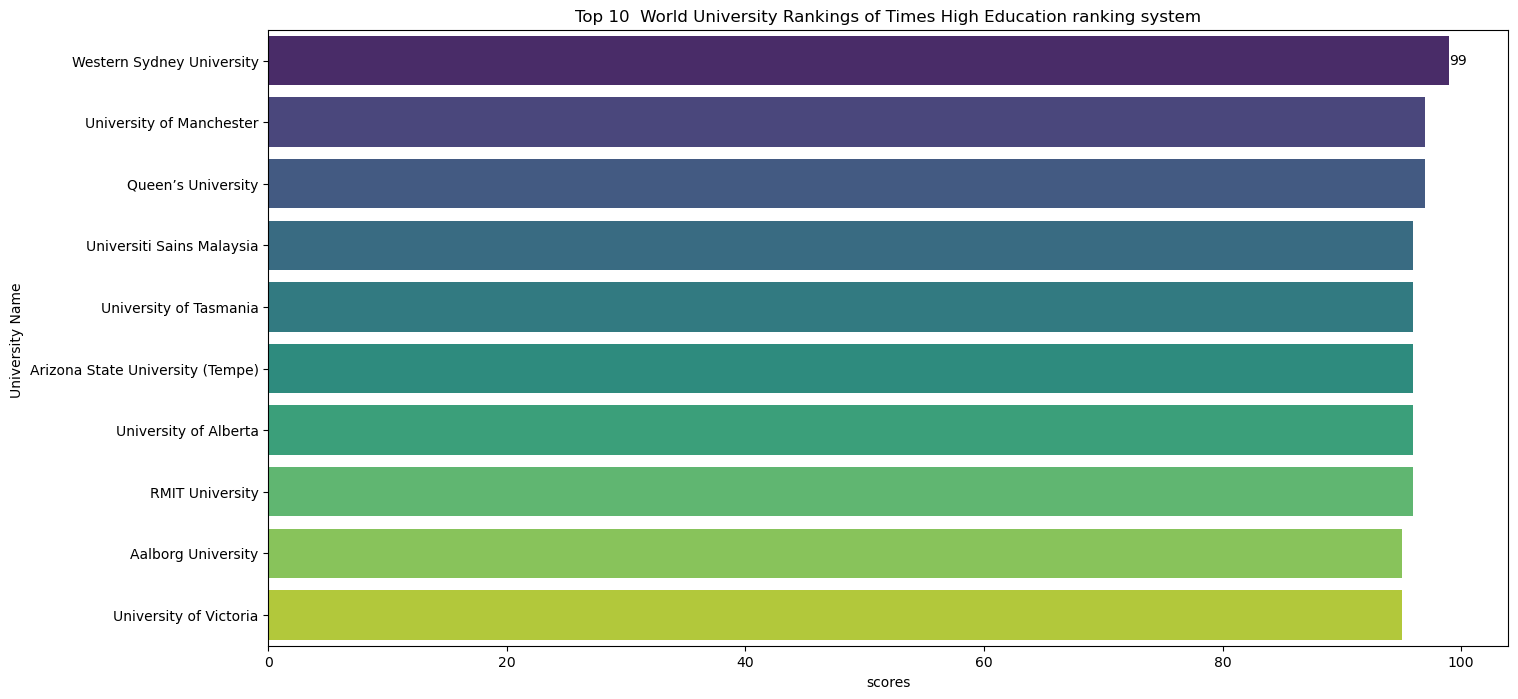

In [390]:

plt.figure(figsize=(16,8))
plt.title('Top 10  World University Rankings of Times High Education ranking system')
t = sns.barplot(x='scores', y='University Name ', data=times_higher_edu_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])
plt.show()

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\845495665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='Score', y='University Names', data=word_rank_univ_df[:10], palette = 'viridis', width = 0.8)


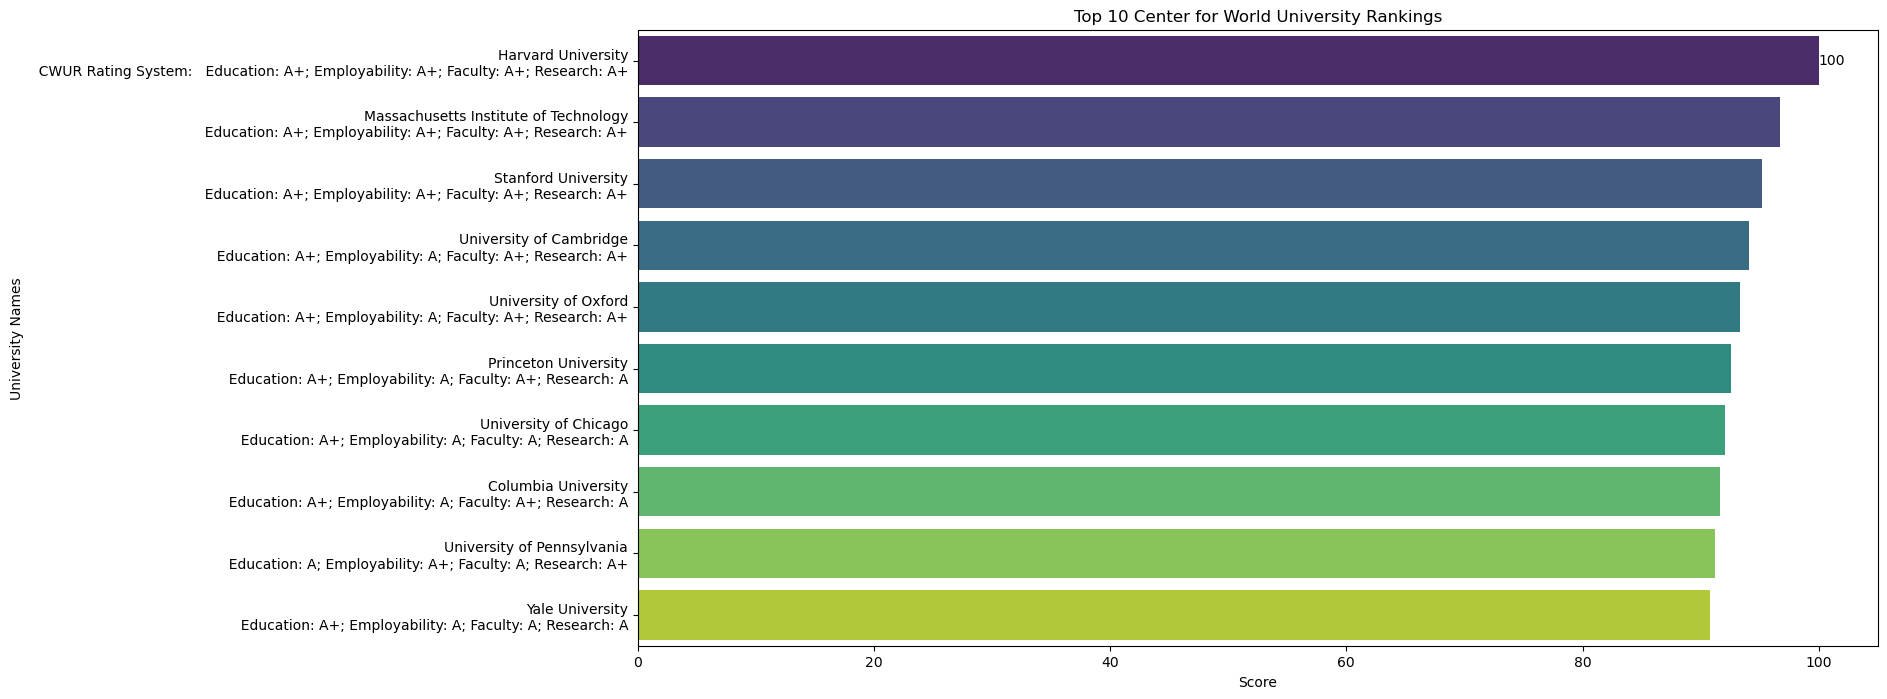

In [392]:
plt.figure(figsize=(16,8))
plt.title('Top 10 Center for World University Rankings')
t = sns.barplot(x='Score', y='University Names', data=word_rank_univ_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])
plt.show()

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\2931364364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_t['scores'] = top10_t['scores'].astype(float)
C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\2931364364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='scores', y='University Name ', data=top10_t[:10], palette = 'viridis', width = 0.8)


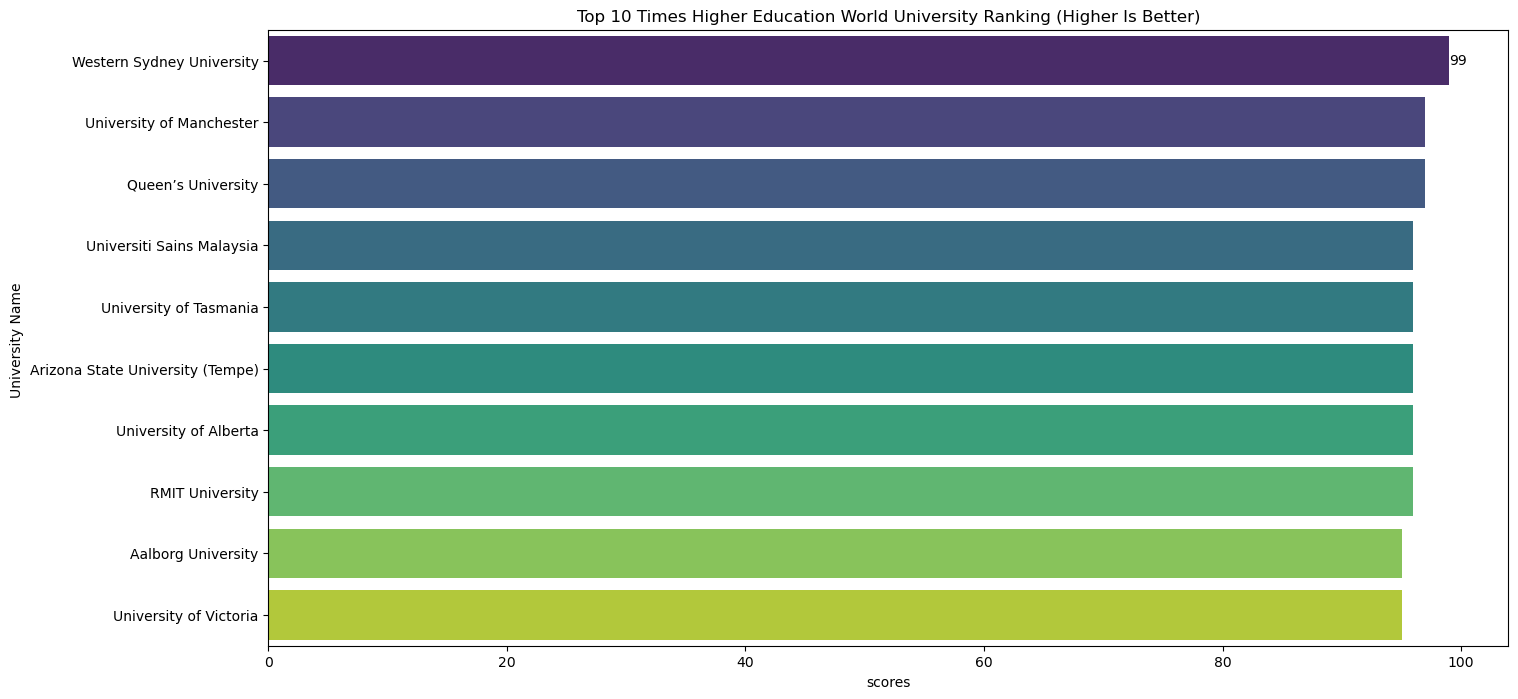

In [393]:
top10_t = times_higher_edu_df.head(10)
top10_t['scores'] = top10_t['scores'].astype(float)

plt.figure(figsize=(16,8))
plt.title('Top 10 Times Higher Education World University Ranking (Higher Is Better)')
t = sns.barplot(x='scores', y='University Name ', data=top10_t[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])
plt.show()

##### Q2 Which universities are ranked in the top 10 for employment outcomes?

C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1240990978.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = word_rank_univ_df.sort_values(by="Employability Rank")[word_rank_univ_df["Employability Rank"] != 0].head(10)
C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1240990978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='Employability Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)


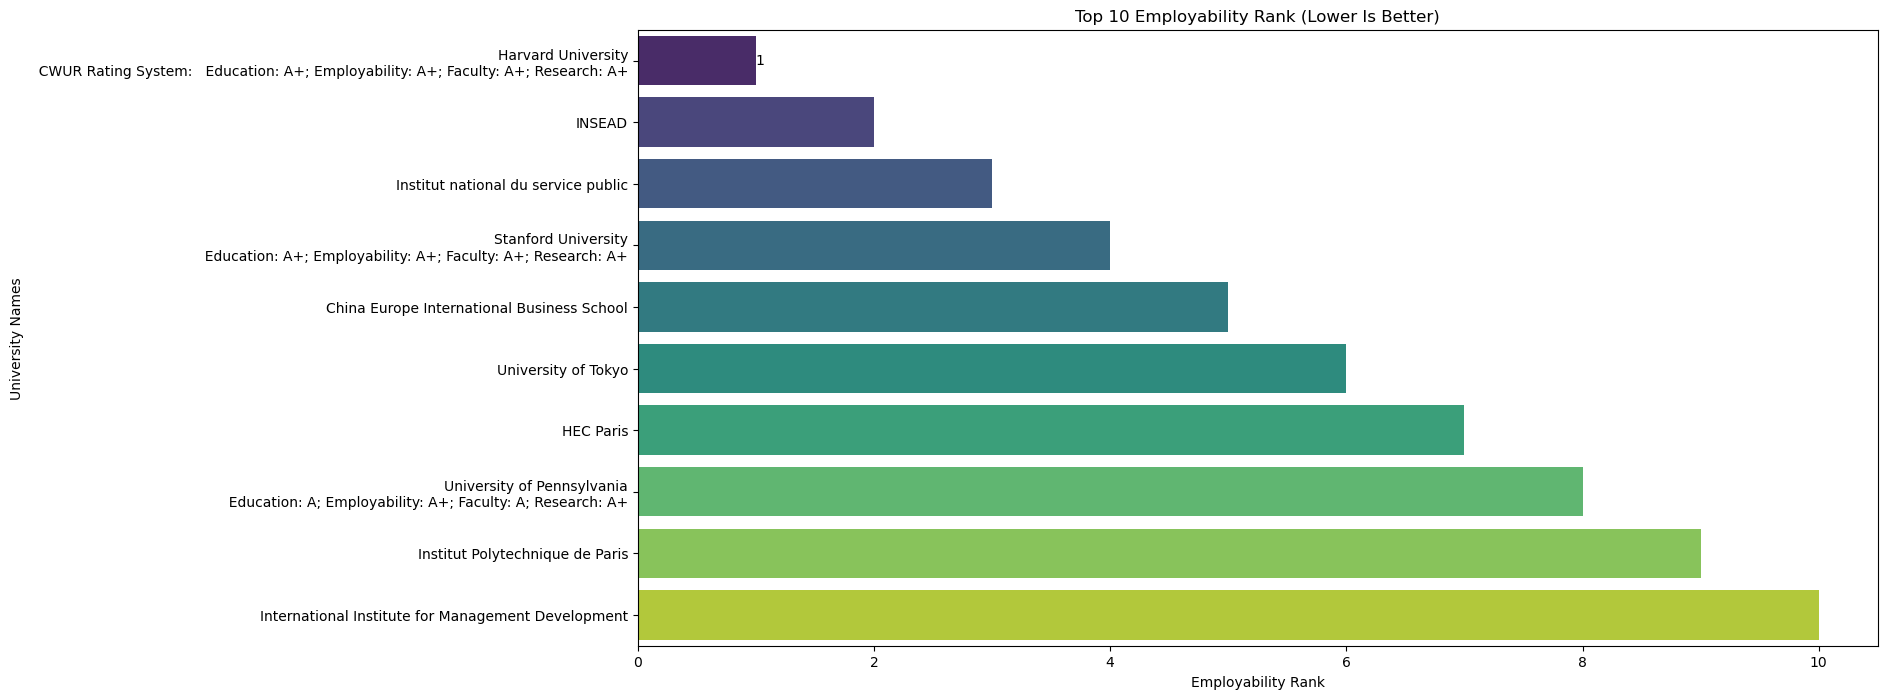

In [397]:
a = word_rank_univ_df.sort_values(by="Employability Rank")[word_rank_univ_df["Employability Rank"] != 0].head(10)
plt.figure(figsize=(16,8))
plt.title('Top 10 Employability Rank (Lower Is Better)')

t = sns.barplot(x='Employability Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])


plt.show()

##### Q3 What positions do universities in Saudi Arabia hold within the global rankings?


C:\Users\Ghada\AppData\Local\Temp\ipykernel_18048\1373483992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  t = sns.barplot(x='World Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)


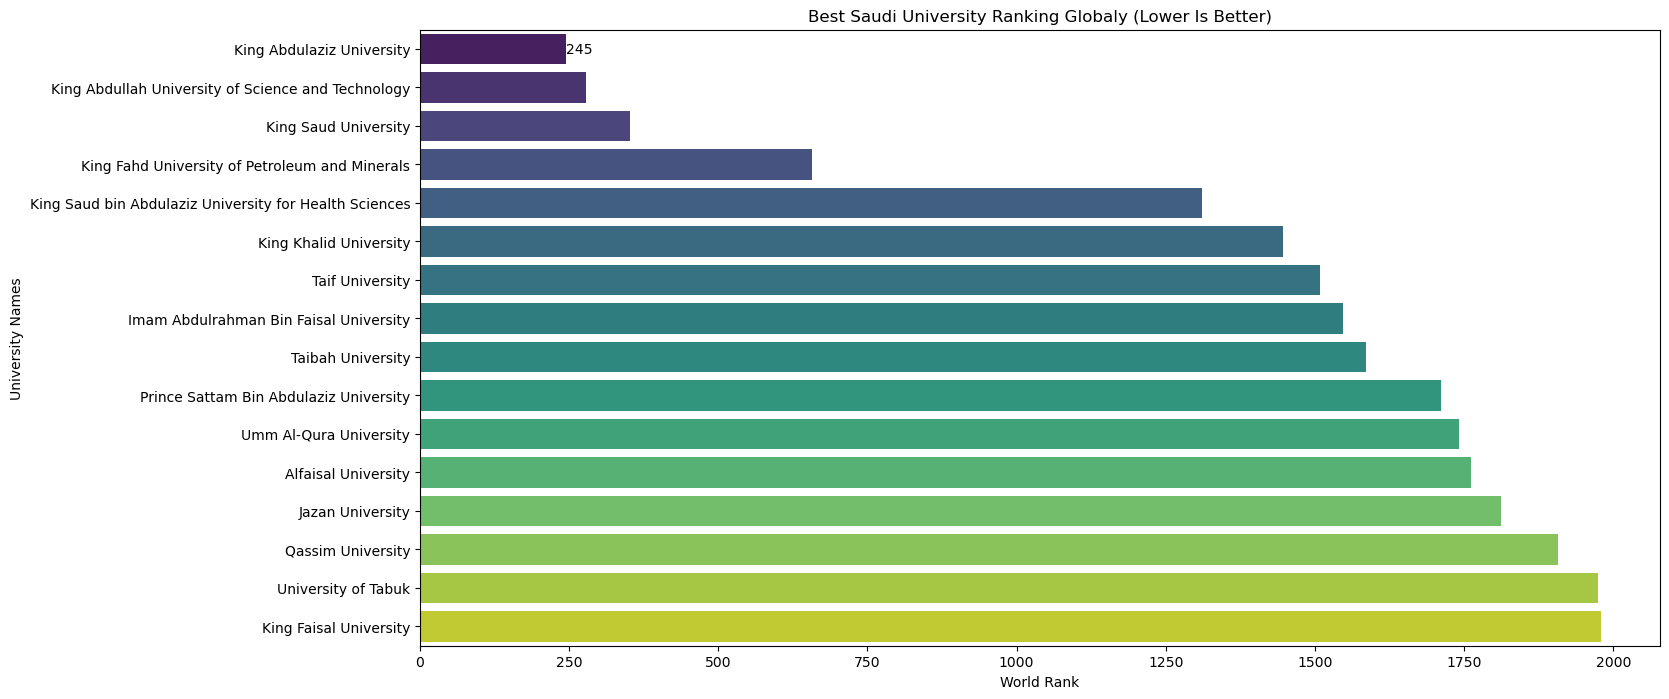

In [403]:
a = word_rank_univ_df[word_rank_univ_df['Location '] == 'Saudi Arabia']

plt.figure(figsize=(16,8))
plt.title('Best Saudi University Ranking Globaly (Lower Is Better)')
t = sns.barplot(x='World Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

plt.show()

##### Q4 Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?


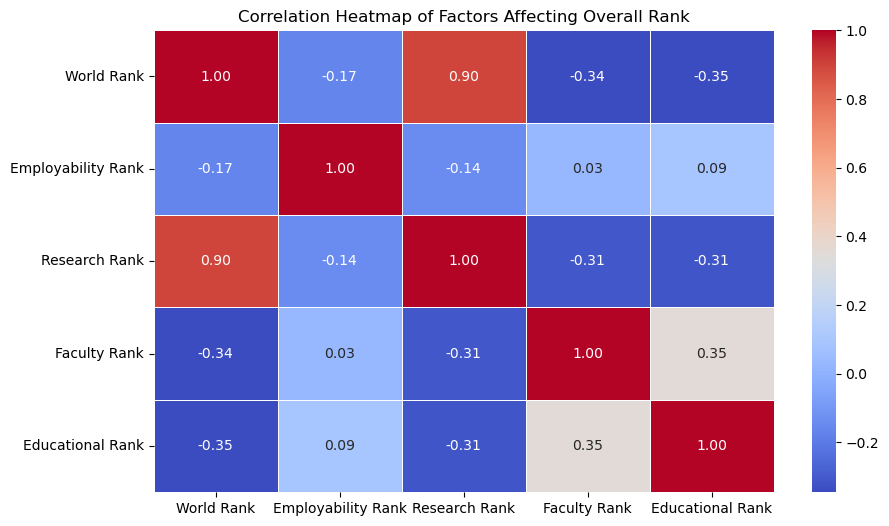

In [401]:
correlation_matrix = word_rank_univ_df[['World Rank', 'Employability Rank', 'Research Rank', 'Faculty Rank', 'Educational Rank']].corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors Affecting Overall Rank')

plt.show()

##### Q5 Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?


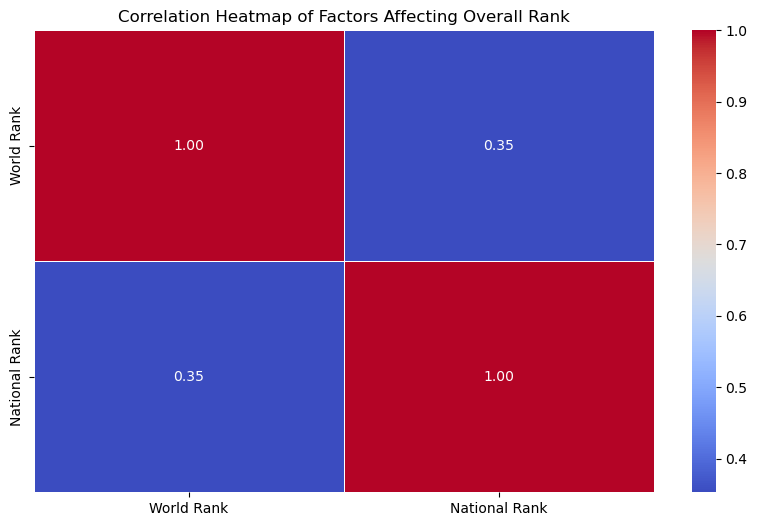

In [402]:
correlation_matrix = word_rank_univ_df[['World Rank', 'National Rank']].corr()

plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap of Factors Affecting Overall Rank')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.show()

##### Bonus question 1

##### Bonus question 2